Código equivalente ao código anterior, mas agora com uma rede neural de duas camadas, onde cada camada tem um neurônio. A primeira camada recebe as entradas, e a segunda camada recebe a saída da primeira camada como entrada. Vamos usar o mesmo dataset fictício (problema XOR) e permitir a escolha de funções de ativação.

In [8]:
#Nome e Matrícula: Henrique Vitral Silva Andrade, 202210201

import numpy as np
import matplotlib.pyplot as plt

# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Derivadas das funções de ativação (para o gradiente)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Dataset fictício (problema de classificação binária)
# Esse Dataset foi feito para calcular o IMC, as entradas são Peso e Altura e a saída seria o IMC
X = np.array([[0.456789, 0.345678], [0.345678, 0.234567], [0.567890, 0.456789], [0.234567, 0.123456], [0.678901,0.567890]])  # Entradas
y = np.array([[0.234567], [0.198765], [0.278901], [0.145678], [0.312345]])              # Saídas esperadas (XOR)

# Hiperparâmetros
learning_rate = 0.5
epochs = 500000

# Inicialização dos pesos e viés
np.random.seed(42)
# Camada 1: 2 entradas -> 1 neurônio
weights_1 = np.random.randn(2, 1)
bias_1 = np.random.randn()

# Camada 2: 1 entrada (saída da camada 1) -> 1 neurônio
weights_2 = np.random.randn(1, 1)
bias_2 = np.random.randn()

# Escolha da função de ativação
activation_function = sigmoid
activation_derivative = sigmoid_derivative

# Treinamento da rede
errors = []
for epoch in range(epochs):
    # Forward pass
    # Camada 1
    weighted_sum_1 = np.dot(X, weights_1) + bias_1
    output_1 = activation_function(weighted_sum_1)

    # Camada 2
    weighted_sum_2 = np.dot(output_1, weights_2) + bias_2
    output_2 = activation_function(weighted_sum_2)

    # Cálculo do erro (erro quadrático médio)
    error = y - output_2
    errors.append(np.mean(np.square(error)))

    # Backpropagation
    # Gradiente da camada 2
    d_error = -2 * error / len(X)
    d_output_2 = activation_derivative(weighted_sum_2)
    gradient_2 = d_error * d_output_2

    # Gradiente da camada 1
    d_output_1 = activation_derivative(weighted_sum_1)
    gradient_1 = np.dot(gradient_2, weights_2.T) * d_output_1

    # Atualização dos pesos e viés
    weights_2 -= learning_rate * np.dot(output_1.T, gradient_2)
    bias_2 -= learning_rate * np.sum(gradient_2)

    weights_1 -= learning_rate * np.dot(X.T, gradient_1)
    bias_1 -= learning_rate * np.sum(gradient_1)

    # Exibir progresso a cada 1000 épocas
    if epoch % 1000 == 0:
        print(f"Época {epoch}, Erro: {errors[-1]}")


Época 0, Erro: 0.21577343854285985
Época 1000, Erro: 0.0031050268424389375
Época 2000, Erro: 0.002711589710617539
Época 3000, Erro: 0.0021273594898106782
Época 4000, Erro: 0.0013824219244989663
Época 5000, Erro: 0.0006972558797795361
Época 6000, Erro: 0.0002878230763718262
Época 7000, Erro: 0.00011946953739939846
Época 8000, Erro: 6.42897644427502e-05
Época 9000, Erro: 4.7446519723767054e-05
Época 10000, Erro: 4.1634472219042855e-05
Época 11000, Erro: 3.8783198911365065e-05
Época 12000, Erro: 3.67453013104467e-05
Época 13000, Erro: 3.498316119009864e-05
Época 14000, Erro: 3.33670643428378e-05
Época 15000, Erro: 3.186497496050251e-05
Época 16000, Erro: 3.0466583234249974e-05
Época 17000, Erro: 2.916577217100664e-05
Época 18000, Erro: 2.7956977898519493e-05
Época 19000, Erro: 2.6834634614077147e-05
Época 20000, Erro: 2.5793209359053604e-05
Época 21000, Erro: 2.482729973620045e-05
Época 22000, Erro: 2.393170572522399e-05
Época 23000, Erro: 2.3101472741630138e-05
Época 24000, Erro: 2.23319

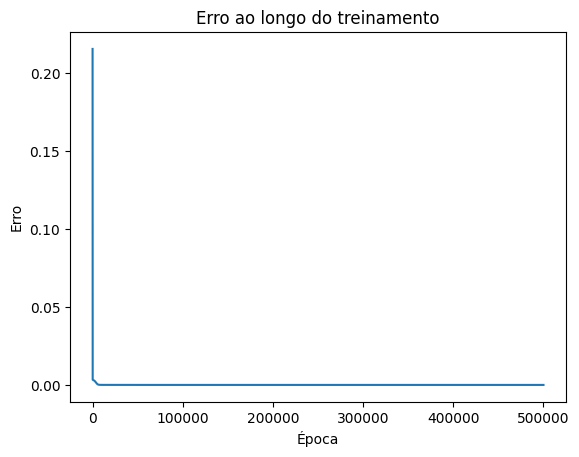


Teste da rede treinada:
Entrada: [0.456789 0.345678], Saída esperada: [0.234567], Saída da rede: [0.23854194]
Entrada: [0.345678 0.234567], Saída esperada: [0.198765], Saída da rede: [0.19290623]
Entrada: [0.56789  0.456789], Saída esperada: [0.278901], Saída da rede: [0.27916335]
Entrada: [0.234567 0.123456], Saída esperada: [0.145678], Saída da rede: [0.14833712]
Entrada: [0.678901 0.56789 ], Saída esperada: [0.312345], Saída da rede: [0.3114289]


In [9]:
# Plot do erro ao longo do treinamento
plt.plot(range(epochs), errors)
plt.title("Erro ao longo do treinamento")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.show()

# Teste da rede treinada
print("\nTeste da rede treinada:")
for i in range(len(X)):
    # Forward pass
    weighted_sum_1 = np.dot(X[i], weights_1) + bias_1
    output_1 = activation_function(weighted_sum_1)

    weighted_sum_2 = np.dot(output_1, weights_2) + bias_2
    output_2 = activation_function(weighted_sum_2)

    print(f"Entrada: {X[i]}, Saída esperada: {y[i]}, Saída da rede: {output_2}")